<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/Best_Model_BroadleafCommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_BroadleafCommerce.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_BroadleafCommerce.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_BroadleafCommerce.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_BroadleafCommerce.csv")

In [5]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model =  RandomForestClassifier(n_estimators=60, max_depth= 15, max_leaf_nodes=70, random_state = 50)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

svm_model =  SVC()
svm_model.fit(train_features, train_target.values.ravel())
svm_model_test_prediction_df = pd.DataFrame ({'svm': svm_model.predict(test_features)})
svm_model_train_prediction_df = pd.DataFrame ({'svm': svm_model.predict(train_features)})

GaussianNB_model =  GaussianNB()
GaussianNB_model.fit(train_features, train_target.values.ravel())
GaussianNB_model_test_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(test_features)})
GaussianNB_model_train_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df, svm_model_test_prediction_df, GaussianNB_model_test_prediction_df, GaussianNB_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df, randomForest_model_train_prediction_df, svm_model_train_prediction_df, GaussianNB_model_train_prediction_df], axis=1)

93/93 [==============================] - 0s 1ms/step


In [6]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
4/4 [==============================] - 4s 163ms/step - loss: 1.0981 - accuracy: 0.4167 - val_loss: 1.1042 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 30ms/step - loss: 1.0967 - accuracy: 0.4167 - val_loss: 1.1099 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.0953 - accuracy: 0.4167 - val_loss: 1.1160 - val_accuracy: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.0938 - accuracy: 0.4167 - val_loss: 1.1225 - val_accuracy: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 33ms/step - loss: 1.0921 - accuracy: 0.4167 - val_loss: 1.1296 - val_accuracy: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 1.0904 - accuracy: 0.4167 - val_loss: 1.1376 - val_accuracy: 0.0000e+00
Epoch 7/1000
4/4 [==============================] - 0s 32ms/step - loss: 1.0881 - accuracy: 0.4167 - val_loss: 1.1465 - val_accur

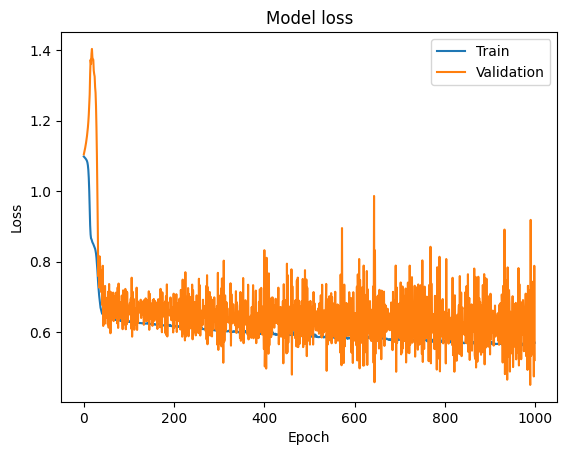



*********************************************




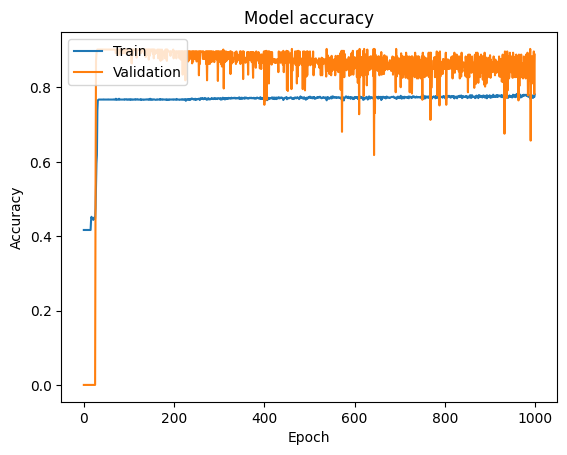



*********************************************
Test-set evaluate result:

15/15 [==============================] - 0s 2ms/step - loss: 1.1891 - accuracy: 0.5086
[1.189107894897461, 0.508583664894104]
15/15 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.68      0.50      0.58       231
     class 1       0.34      0.54      0.42       139
     class 2       0.59      0.49      0.53        96

    accuracy                           0.51       466
   macro avg       0.54      0.51      0.51       466
weighted avg       0.56      0.51      0.52       466



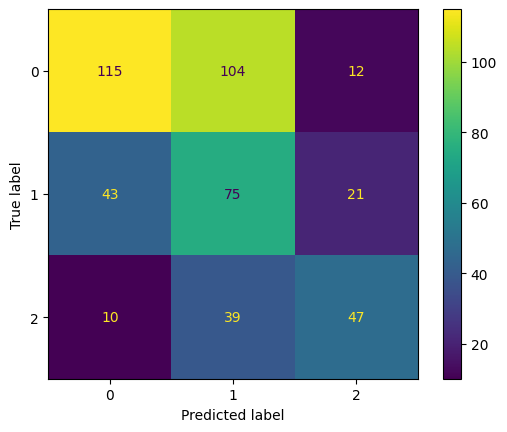



*********************************************
Train-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7985
[0.5586495399475098, 0.7985125184059143]
93/93 [==============================] - 0s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.82      0.75      0.78       986
     class 1       0.72      0.78      0.75       986
     class 2       0.86      0.87      0.86       986

    accuracy                           0.80      2958
   macro avg       0.80      0.80      0.80      2958
weighted avg       0.80      0.80      0.80      2958



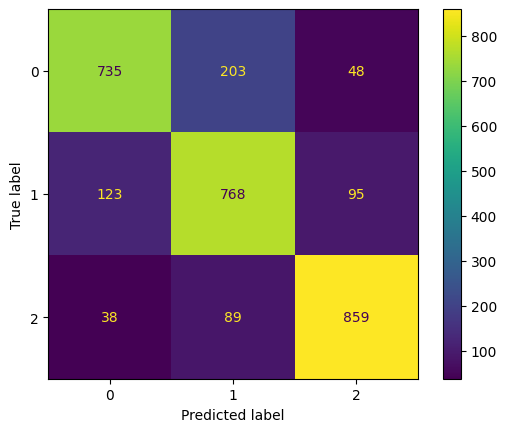

In [8]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
1/1 [==============================] - 0s 93ms/step - loss: 0.5682 - accuracy: 0.7760 - val_loss: 0.6143 - val_accuracy: 0.8480
Epoch 2/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.5609 - accuracy: 0.7785 - val_loss: 0.7145 - val_accuracy: 0.8193
Epoch 3/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5693 - accuracy: 0.7798 - val_loss: 0.7058 - val_accuracy: 0.8226
Epoch 4/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.5686 - accuracy: 0.7806 - val_loss: 0.6081 - val_accuracy: 0.8480
Epoch 5/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.5609 - accuracy: 0.7768 - val_loss: 0.5332 - val_accuracy: 0.8885
Epoch 6/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.5649 - accuracy: 0.7773 - val_loss: 0.5252 - val_accuracy: 0.8885
Epoch 7/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.5673 - accuracy: 0.7756 - val_loss: 0.5835 - val_accuracy: 0.8682
Epoch 8/1000


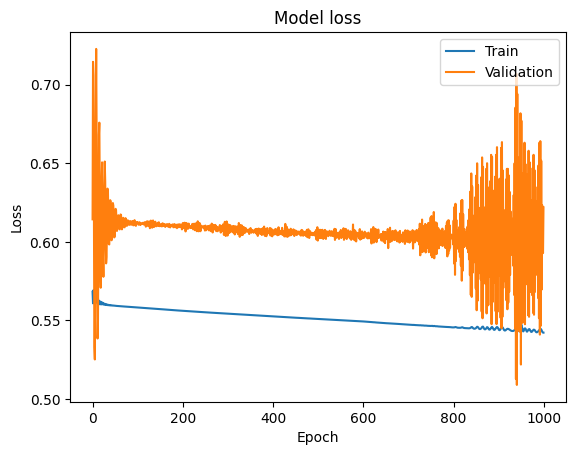



*********************************************




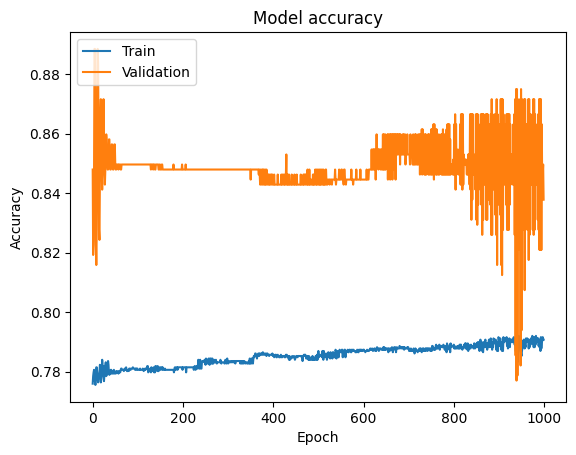



*********************************************
Test-set evaluate result:

15/15 [==============================] - 0s 2ms/step - loss: 1.3067 - accuracy: 0.5021
[1.3066655397415161, 0.5021459460258484]
15/15 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.67      0.52      0.58       231
     class 1       0.33      0.50      0.40       139
     class 2       0.59      0.46      0.51        96

    accuracy                           0.50       466
   macro avg       0.53      0.49      0.50       466
weighted avg       0.55      0.50      0.51       466



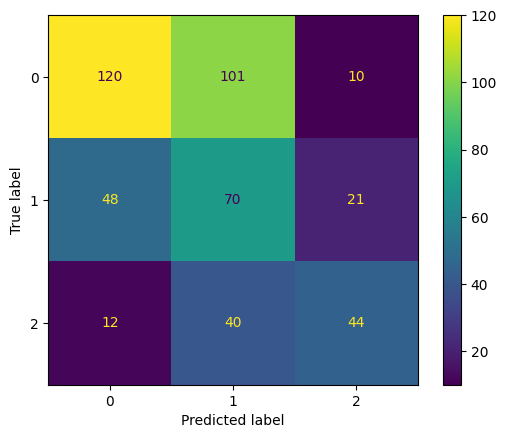



*********************************************
Train-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8012
[0.5583139657974243, 0.8012170195579529]
93/93 [==============================] - 0s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.83      0.76      0.80       986
     class 1       0.71      0.82      0.76       986
     class 2       0.89      0.83      0.86       986

    accuracy                           0.80      2958
   macro avg       0.81      0.80      0.80      2958
weighted avg       0.81      0.80      0.80      2958



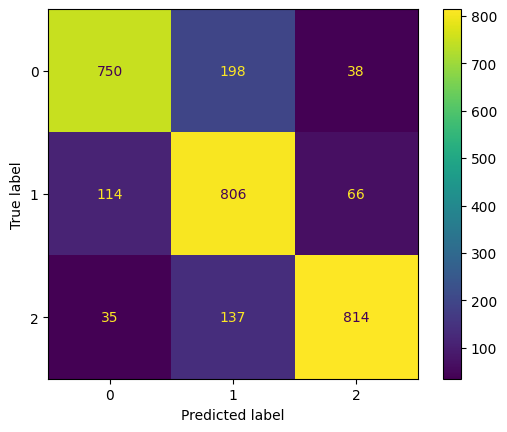

In [9]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [10]:
checkpoint.best

0.5422215461730957

Test-set evaluate result:

15/15 [==============================] - 0s 3ms/step - loss: 1.3067 - accuracy: 0.5021
[1.3066655397415161, 0.5021459460258484]
15/15 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.67      0.52      0.58       231
     class 1       0.33      0.50      0.40       139
     class 2       0.59      0.46      0.51        96

    accuracy                           0.50       466
   macro avg       0.53      0.49      0.50       466
weighted avg       0.55      0.50      0.51       466



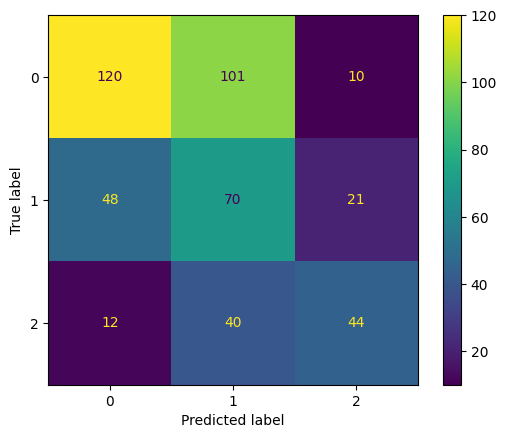



*********************************************
Train-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8012
[0.5583139657974243, 0.8012170195579529]
93/93 [==============================] - 0s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.83      0.76      0.80       986
     class 1       0.71      0.82      0.76       986
     class 2       0.89      0.83      0.86       986

    accuracy                           0.80      2958
   macro avg       0.81      0.80      0.80      2958
weighted avg       0.81      0.80      0.80      2958



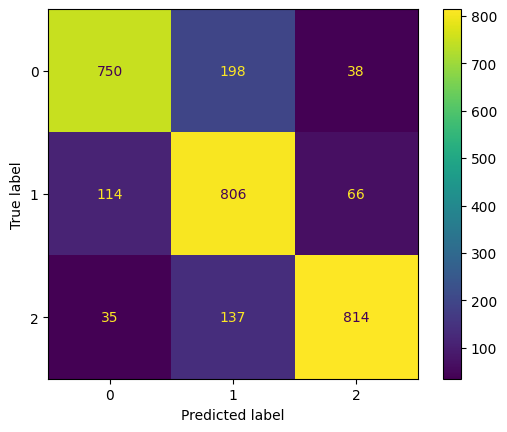

In [11]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()